In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas as pd
import os
from sklearn import svm
import seaborn as sns
import random as rd
from warnings import filterwarnings
filterwarnings("ignore")

In [5]:
root = os.getcwd()

In [6]:
os.chdir("/Users/mohdzaki/Downloads/")
from plot import *
set_things()
os.chdir(root)

<h2>Q1. Plot the data (Data.xlsx) to get an idea of the data distribution. 
<p>Plot Result 1 on x-axis and Result 2 on y-axis. Report your visual observations. 

In [163]:
df = pd.read_excel("Data.xlsx")
df.head()

,Result 1,Result 2
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


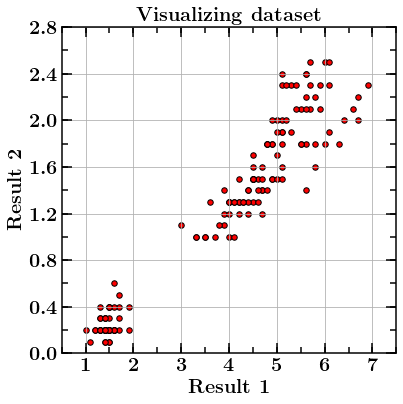

In [165]:
#VISUALISING THE DATA
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

fig, ax = plt.subplots()

# ax.scatter(veilgud['Vd'],veilgud['nd'],s=2)
# # ax.set_xlim([max(veilgud['Vd'])+10, min(veilgud['Vd'])-5])
# ax.set_xlim([90,0])

ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.xaxis.set_major_locator(MultipleLocator(1))

ax.yaxis.set_minor_locator(MultipleLocator(.2))
ax.yaxis.set_major_locator(MultipleLocator(.4))
ylim([0,2.8])
xlim([0.5,7.5])
X1=df['Result 1']
X2=df['Result 2']
ax.scatter(X1,X2,s=30,c='r',edgecolors='k')
plt.xlabel(r'\textbf{{{}}}'.format('Result 1'))
plt.ylabel(r'\textbf{{{}}}'.format('Result 2'))
plt.title(r'\textbf{{{}}}'.format('Visualizing dataset'))


plt.grid()

plt.savefig('A4_Q1_1Visualising data.png',bbox_inches='tight',dpi=1200)
plt.show()

<h2>Q2. Apply K-Means clustering on the data to find out the 2 clusters. 
<p>Make appropriate plots.


In [44]:
#Setting up data
X = df.iloc[:,:].values

#Finding num_samples and num_features
m=X.shape[0] #m = num_training_samples
n=X.shape[1] #n = num_features

n_iter=100   #no. of iterations

K=2          #no. of classes

Centroids=np.array([]).reshape(n,0) 

#Initializing centroids

for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]
    
print("Initialised centroids are \n",Centroids)
    
Output={}
for i in range(n_iter):

    center_distance=np.array([]).reshape(m,0)

    for k in range(K):
        tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
        center_distance=np.c_[center_distance,tempDist]
    C=np.argmin(center_distance,axis=1)+1
    Y={}
    for k in range(K):
        Y[k+1]=np.array([]).reshape(2,0)
    for i in range(m):
        Y[C[i]]=np.c_[Y[C[i]],X[i]]     
    for k in range(K):
        Y[k+1]=Y[k+1].T    
    for k in range(K):
        Centroids[:,k]=np.mean(Y[k+1],axis=0)
Output=Y
print("Final centroids of %d clusters\n"%(n),Centroids)

Initialised centroids are 
 [[6.1 5.9]
 [2.5 2.3]]
Final centroids of 2 clusters
 [[4.92525253 1.49215686]
 [1.68181818 0.2627451 ]]


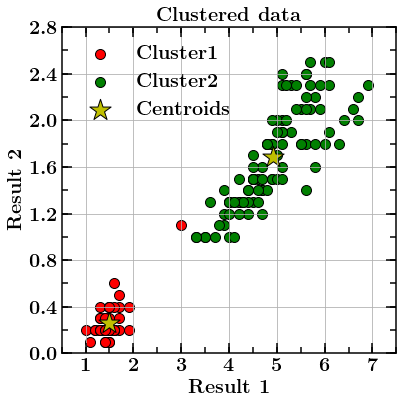

In [170]:
#Plotting results 
fig, ax = plt.subplots()

ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.xaxis.set_major_locator(MultipleLocator(1.0))

ax.yaxis.set_minor_locator(MultipleLocator(.2))
ax.yaxis.set_major_locator(MultipleLocator(.4))
ylim([0,2.8])
xlim([0.5,7.5])
color=['red','green']
labels=[r'\textbf{{{}}}'.format('Cluster1'),r'\textbf{{{}}}'.format('Cluster2')]
for k in range(K):
    ax.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k],edgecolors='k')
ax.scatter(Centroids[0,:],Centroids[1,:],s=500,c='y',label=r'\textbf{{{}}}'.format('Centroids'),edgecolors='k',marker='*')
plt.xlabel(r'\textbf{{{}}}'.format('Result 1'))
plt.ylabel(r'\textbf{{{}}}'.format('Result 2'))
plt.title(r'\textbf{{{}}}'.format("Clustered data"))
plt.legend()
plt.grid()
plt.savefig('A4_Q2_Kmeans.png',bbox_inches='tight',dpi=1200)
plt.show()

<h2>Q3. Plot the data (Data_GMM.xlsx) to get an idea of the data distribution. 
<p>Plot Result 1 on x-axis and Result 2 on y-axis. Report your visual observations. 

In [104]:
#Loading the data
df1= pd.read_excel("Data_GMM.xlsx")

df1.head()

,Result 1,Result 2
0,1.790702,0.756250
1,1.287721,0.102399
2,1.003226,0.207663
3,1.365617,0.047025
4,4.526678,1.353905


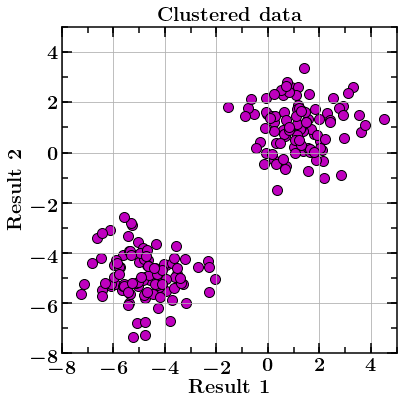

In [172]:
#VISUALISING THE DATA
fig, ax = plt.subplots()

ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.set_major_locator(MultipleLocator(2.0))

ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(2))
ylim([-8,5])
xlim([-8,5])

X1=df1['Result 1']
X2=df1['Result 2']
plt.scatter(X1,X2,s=100,edgecolors='k',c='m')
plt.xlabel(r'\textbf{{{}}}'.format('Result 1'))
plt.ylabel(r'\textbf{{{}}}'.format('Result 2'))
plt.title(r'\textbf{{{}}}'.format("Clustered data"))
plt.grid()
plt.savefig('A4_Q3_Visualising_data.png',bbox_inches='tight',dpi=1200)
plt.show()

<h2>Q4. Apply Gaussian Mixture Model on the Data_GMM.xlsx to find out the 2
clusters. 
<p>Make appropriate plots.

In [112]:
#loading the data
X = df1.copy()
N, nfeatures = X.shape[0], X.shape[1]

In [179]:
#Setting up data
X = df1.iloc[:,:].values

#Finding num_samples and num_features
m=X.shape[0] #m = num_training_samples
n=X.shape[1] #n = num_features

n_iter=200   #no. of iterations

K=2          #no. of classes

Centroids=np.array([]).reshape(n,0) 

#Initializing centroids

for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]
    
print("Initialised centroids are \n",Centroids)
    
Output={}
for i in range(n_iter):

    center_distance=np.array([]).reshape(m,0)

    for k in range(K):
        tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
        center_distance=np.c_[center_distance,tempDist]
    C=np.argmin(center_distance,axis=1)+1
    Y={}
    for k in range(K):
        Y[k+1]=np.array([]).reshape(2,0)
    for i in range(m):
        Y[C[i]]=np.c_[Y[C[i]],X[i]]     
    for k in range(K):
        Y[k+1]=Y[k+1].T    
    for k in range(K):
        Centroids[:,k]=np.mean(Y[k+1],axis=0)
Output=Y
print("Final centroids of %d clusters\n"%(n),Centroids)

Initialised centroids are 
 [[-5.90483445 -5.0388237 ]
 [-4.2836572  -5.15261148]]
Final centroids of 2 clusters
 [[-4.81815103  1.19721315]
 [-4.87158388  1.00893775]]


In [116]:
mu = Centroids.T

[[-4.81815103 -4.87158388]
 [ 1.19721315  1.00893775]] [[[ 1.16968737 -0.10528566]
  [-0.10528566  0.80018909]]

 [[ 1.19169015  0.00910693]
  [ 0.00910693  0.97049735]]]


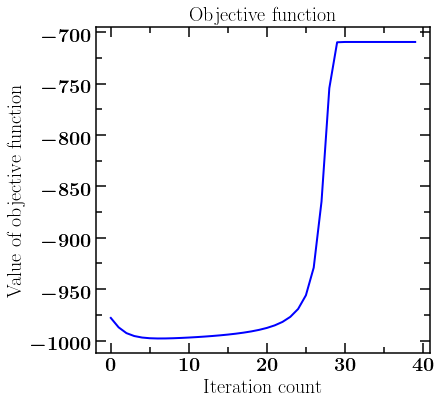

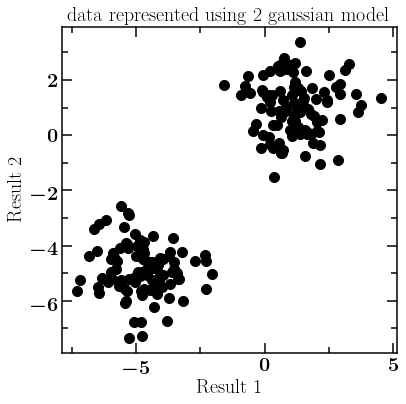

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# df = pd.read_csv("**.csv")
df = df1.copy()

x1 = df['Result 1']
x2 = df['Result 2']
data = [x1, x2]


# plt.scatter(x1,x2,c='k',marker="o")
# plt.xlim(-8, 7)
# plt.ylim(-8, 4)
# plt.xlabel("Result 1")
# plt.ylabel("Result 2")
# plt.title("Plot of Result 1 vs Result 2")
# plt.show()

# estimate the mean and variance of the data

x1_mean = np.mean(x1)
x2_mean = np.mean(x2)
x_m = np.array([x1_mean, x2_mean])

x_mean = np.array([0.1*x_m, 0.4 * x_m])

x_covar = np.array([np.cov(x1, x2), 0.2 * np.cov(x1, x2)])

Pi = np.array([0.1, 0.9])

obj = []
count = 0
while count < 40:

    # Expectation step

    resp = np.ones((len(x1), len(Pi)))
    for i in range(0, len(x1)):
        denom = 0
        for k in range(0, 2):
            denom = denom + Pi[k] * multivariate_normal.pdf(np.array(df.iloc[i, :]), mean=x_mean[k, :],
                                                            cov=x_covar[k, :, :])

        for k in range(0, 2):
            resp[i][k] = Pi[k] * multivariate_normal.pdf(np.array(df.iloc[i, :]), mean=x_mean[k, :],
                                                         cov=x_covar[k, :, :]) / denom

    # Maximization step

    new_mean = []
    new_cov = []
    new_Pi = []

    for k in range(0, 2):
        tot = 0
        wavg_mean = 0
        wavg_cov = 0
        pnew = 0

        for i in range(0, len(x1)):
            tot = tot + resp[i][k]
            wavg_mean = wavg_mean + resp[i][k] * (np.array(df.iloc[i, :]))
            h = (np.array(df.iloc[i, :]) - x_mean[k, :]).reshape(len(Pi),1)
            wavg_cov = wavg_cov + resp[i][k] * np.matmul(h,np.transpose(h))
            pnew = pnew + resp[i][k]

        new_mean.append(wavg_mean / tot)
        new_cov.append(wavg_cov / tot)
        new_Pi.append(pnew/len(x1))

    new_mean = np.array(new_mean)
    new_cov = np.array(new_cov)
    new_Pi = np.array(new_Pi)

    x_mean = new_mean
    x_covar = new_cov
    Pi = new_Pi

    # objective function
    tot = 0
    for i in range(0,len(x1)):
        for k in range(0,len(Pi)):
           tot = tot + (resp[i][k]*(np.log(Pi[k])+np.log(multivariate_normal.pdf(np.array(df.iloc[i, :]), mean=x_mean[k, :],
                                                         cov=x_covar[k, :, :]) )))

    obj.append(tot)
    count = count+1


print(new_mean,new_cov)
plt.plot(obj)
plt.xlabel("Iteration count")
plt.ylabel("Value of objective function")
plt.title("Objective function")
plt.show()

x, y = np.mgrid[-10:10:.01, -7:5:.01]
pos = np.dstack((x, y))

rv1 = multivariate_normal(x_mean[0,:],x_covar[0,:,:])
rv2 = multivariate_normal(x_mean[1,:],x_covar[1,:,:])


fig = plt.figure()
ax1 = fig.add_subplot()
c = rv1.pdf(pos)-rv2.pdf(pos)
# ax1.contour(x, y, rv1.pdf(pos)-rv2.pdf(pos),10,colors=('r','m'))
# ax1.contourf(x, y, rv1.pdf(pos)-rv2.pdf(pos), levels = 20, cmap ='viridis')
plt.scatter(x1,x2,c='k',marker='o')
plt.xlabel("Result 1")
plt.ylabel("Result 2")
plt.title("data represented using 2 gaussian model")
plt.show()

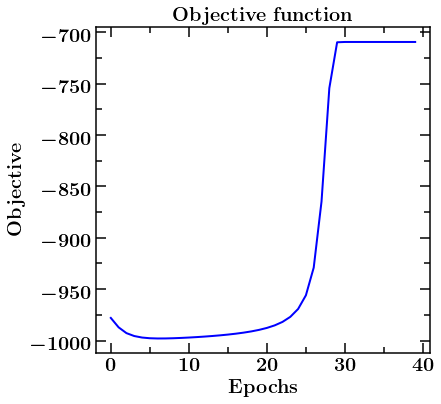

In [177]:
plt.plot(obj)
plt.xlabel(r'\textbf{{{}}}'.format("Epochs"))
plt.ylabel(r'\textbf{{{}}}'.format("Objective"))
plt.title(r'\textbf{{{}}}'.format("Objective function"))
plt.savefig('A4_Q4_GMM_Objective.png',bbox_inches='tight',dpi=1200)
plt.show()

In [125]:
print(new_mean)

[[-4.81815103 -4.87158388]
 [ 1.19721315  1.00893775]]


In [126]:
print(Centroids)

[[1.49215686 4.92525253]
 [0.2627451  1.68181818]]


In [127]:
print(new_cov)

[[[ 1.16968737 -0.10528566]
  [-0.10528566  0.80018909]]

 [[ 1.19169015  0.00910693]
  [ 0.00910693  0.97049735]]]


In [128]:
print(new_Pi)

[0.5 0.5]


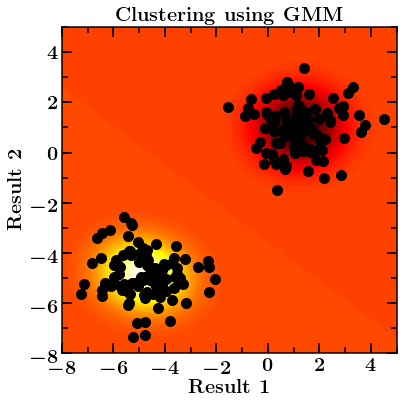

In [173]:
# fig = plt.figure()
# ax1 = fig.add_subplot()
fig, ax = plt.subplots()


x, y = np.mgrid[-8:5:.01, -8:5:.01]
pos = np.dstack((x, y))

rv1 = multivariate_normal(x_mean[0,:],x_covar[0,:,:])
rv2 = multivariate_normal(x_mean[1,:],x_covar[1,:,:])

c = rv1.pdf(pos)-rv2.pdf(pos)
# plt.contourf(x, y, rv1.pdf(pos)-rv2.pdf(pos),10,colors=('r','m'),alpha=0.5)
plt.contourf(x, y, rv1.pdf(pos)-rv2.pdf(pos), levels = 100, cmap ='hot')
plt.scatter(x1,x2,c='k',marker='o')
plt.xlabel("Result 1")
plt.ylabel("Result 2")

ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.set_major_locator(MultipleLocator(2.0))

ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(2))
ylim([-8,5])
xlim([-8,5])

plt.xlabel(r'\textbf{{{}}}'.format('Result 1'))
plt.ylabel(r'\textbf{{{}}}'.format('Result 2'))
plt.title(r'\textbf{{{}}}'.format("Clustering using GMM"))
plt.savefig('A4_Q4_GMM_Clusters.png',bbox_inches='tight',dpi=1200)
plt.show()